# Transformación de datos

In [1]:
from os import chdir
# from dotenv import load_dotenv, find_dotenv

chdir("..")
# load_dotenv('conf/.local') 

In [2]:
!ls

Data                 Proyectos            test.html
Notebooks            docs                 utils
Practicas_Datamining images


In [3]:
from matplotlib.pyplot import tight_layout, show,subplot,legend ,subplots, xlabel, style,hist, figure
from numpy import mean, std, nan
from pandas import set_option, cut, Series,qcut
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame
from seaborn import boxplot, set,histplot
# Establece el estilo de seaborn

from utils.utils import toggle_cell_code
from numpy import array, inf
from pandas import read_csv

set_option('display.float_format', lambda x: '%.1f' % x)
# set_option('precision', 5)
set(style="whitegrid")


## Transformación de datos

### Introducción

La transformación de datos es otra fase importante en la preparación de los datos y un paso previo crucial para cualquier método de aprendizaje automático. Existen diferentes razones para transformar los datos, siendo las principales:
* Eliminar el sesgo en diferentes tipos de análisis debido a diferencias en las escales de los atributos.
* Ajustar los datos a una determinada distribución de probabilidades.
* Reducir la cantidad de atributos.
* Reducir la cantidad de muestras.
* Obtener descripciones basadas en atributos independientes.


### Normalización


Normalización significa convertir los valores de atributos de punto flotante de su rango natural (p. ej., 100 a 900) al rango estándar (p. ej., 0 a 1 o -1 a +1). Si un conjunto de atributos consiste solo en una única función, el ajuste no ofrece ningún beneficio real. Sin embargo, si el conjunto de atributos consiste en varios atributos, el ajuste puede ser útil.
- Acelera la convergencia del descenso de gradientes.
- Permite evitar la "trampa de N/A", en la que un número del modelo se convierte en un NaN (p. ej., cuando un valor excede el límite de precisión de punto flotante durante el entrenamiento) y, debido a operaciones matemáticas, el resto de los números en el modelo finalmente se convierte en NaN.
- Permite que el modelo aprenda las ponderaciones correspondientes para cada atributo. Sin el ajuste de atributos, el modelo les prestará demasiada atención a los atributos con un rango más amplio.

No es necesario indicar el mismo ajuste para cada atributo de punto flotante. No hay problema si el Atributo A se ajusta de -1 a +1 y el Atributo B se ajusta de -3 a +3. Sin embargo, el modelo tendrá problemas si el Atributo B se escala de 5,000 a 100,000.

Dicho de otra forma, este procedimiento tiene el objeto de redimensionar y transformar los valores de los diferentes atributos y/o datos en un problema para ubicarlos en un mismo rango. Esto es particularmente imprtante para realizar comparaciones, por ejemplo a través de medidas de distancia.

Existen diversas formas de hacer la normalización de los datos, siendo las principales las siguientes:

* **Escalamiento de características (Min-Max o Minimax)**: Consiste en modificar todos los datos para que queden en el rango [0, 1]<br><br>
$$X'=\frac{X-X_{\min}}{X_{\max}-X_{\min }}$$<br>
Un problema de esta aproximación es que si posteriormente se reciben datos por afuera del rango original contemplado, $[X_{\min}, X_{\max}]$, el nuevo dato transformado quedaría fuera de [0, 1], que es contrario a la premisa de transformación.<br><br>

* **Estandarización (Z-Score)**: El objetivo es ajustar los datos bajo una premisa de distribución normal. Tiene la ventaja de que no es "desbordado" por los nuevos valores. La transformación es:
$$X = \frac {X-\mu }{\sigma }$$

Consideremos, por ejemplo el conjunto de __Sinteticos__ y observemos los rangos de variación de los diferentes atributos:

Creamos el __dataset__

In [4]:
# Crear un DataFrame de ejemplo con múltiples características
data = {
    'Edad': [30, 40, 25, 50, 35],
    'Ingreso Anual (en miles)': [5, 30, 2, 80, 10],
    'Nivel de Educación (0-10)': [7, 9, 5, 10, 6],
    'Puntaje de Crédito (300-850)': [750, 680, 620, 800, 720]
}

df = DataFrame(data)

In [5]:
print("Datos originales:")
display(df)

Datos originales:


,Edad,Ingreso Anual (en miles),Nivel de Educación (0-10),Puntaje de Crédito (300-850)
0,30,5,7,750
1,40,30,9,680
2,25,2,5,620
3,50,80,10,800
4,35,10,6,720


Transformando los datos por estandarización manual para una columna:

In [6]:
media = df.Edad.mean()
sigma = df.Edad.std()
Edad_std = (df.Edad - media) / sigma


In [7]:
Edad_std

0   -0.62
1    0.42
2   -1.14
3    1.46
4   -0.10
Name: Edad, dtype: float64

para todo el `Dataset` de forma _artesanal_ obtenemos:

In [8]:
# Calcular la media y la desviación estándar de cada característica
mean = mean(df.values, axis=0)
std_dev = std(df.values, axis=0)

# Estandarizar manualmente los datos
standardized_data = (df.values - mean) / std_dev

In [9]:
display(DataFrame(standardized_data))

,0,1,2,3
0,-0.70,-0.70,-0.22,0.59
1,0.46,0.16,0.86,-0.56
2,-1.28,-0.81,-1.29,-1.54
3,1.63,1.88,1.40,1.41
4,-0.12,-0.53,-0.75,0.10


utilizand la función `MinMaxScaler` :
 

In [10]:
# Normalizar las características utilizando Min-Max Scaling
scaler = MinMaxScaler()
df_normalized = DataFrame(scaler.fit_transform(df), columns=df.columns)

In [11]:
print("\nDatos normalizados:")
display(df_normalized)


Datos normalizados:


,Edad,Ingreso Anual (en miles),Nivel de Educación (0-10),Puntaje de Crédito (300-850)
0,0.20,0.04,0.40,0.72
1,0.60,0.36,0.80,0.33
2,0.00,0.00,0.00,0.00
3,1.00,1.00,1.00,1.00
4,0.40,0.10,0.20,0.56


In [12]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a tus datos (calcular la media y la desviación estándar)
scaler.fit(df)

# Estandarizar los datos (Z-score)
df_standardized = DataFrame(scaler.fit_transform(df), columns=df.columns)

In [13]:
df_standardized

,Edad,Ingreso Anual (en miles),Nivel de Educación (0-10),Puntaje de Crédito (300-850)
0,-0.70,-0.70,-0.22,0.59
1,0.46,0.16,0.86,-0.56
2,-1.28,-0.81,-1.29,-1.54
3,1.63,1.88,1.40,1.41
4,-0.12,-0.53,-0.75,0.10


Codigo

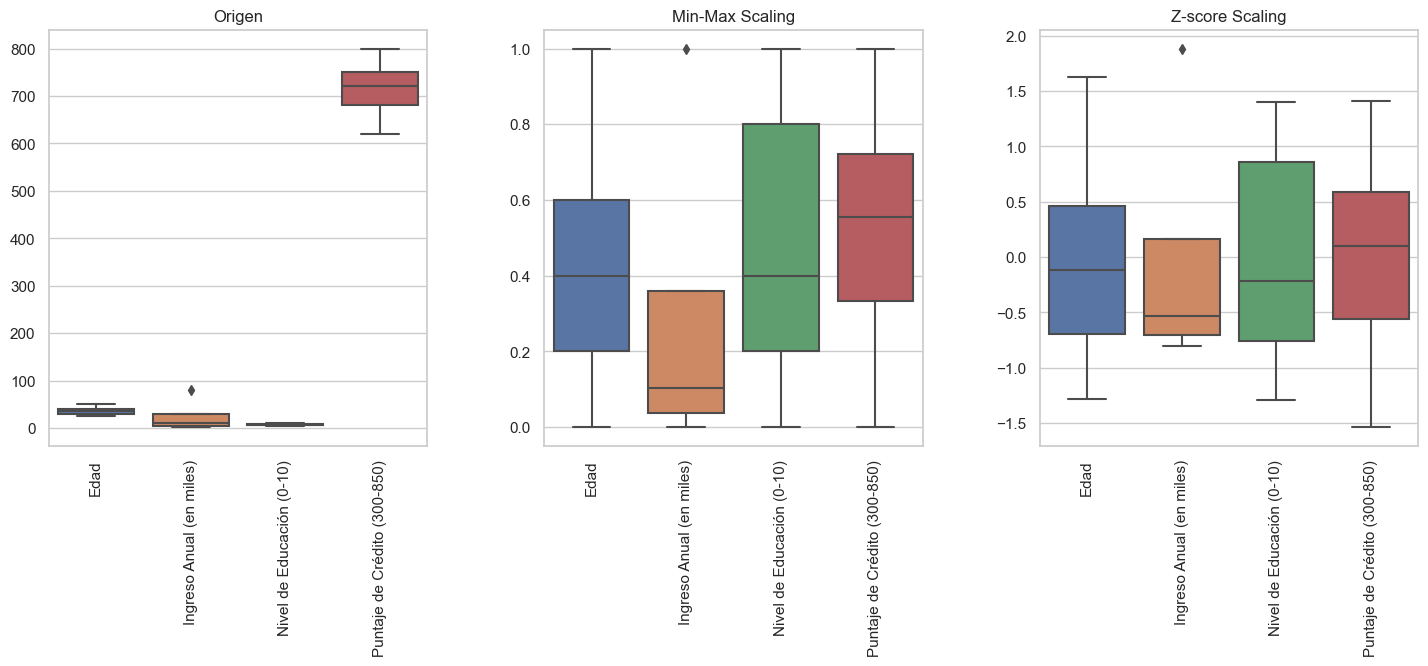

In [14]:
toggle_cell_code('id_1')

# Configurar el estilo de seaborn (opcional)
set(style="whitegrid")


# Crear la figura y los ejes (subplots)
fig, axs = subplots(1, 3, figsize=(15, 5))  # 1 fila y 3 columnas

# Graficar boxplots en los subplots usando seaborn
boxplot(data=df, ax=axs[0])
axs[0].set_title('Origen')

boxplot(data=df_normalized, ax=axs[1])
axs[1].set_title('Min-Max Scaling')

boxplot(data=df_standardized, ax=axs[2])
axs[2].set_title('Z-score Scaling')

# Ajustar el espacio entre los subplots
tight_layout()


# Rotar las etiquetas del eje x 90 grados
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Mostrar los gráficos
show()




<div class="alert alert-warning" role="alert">

La elección de utilizar la normalización Min-Max o la estandarización Z-score depende del problema y los datos en cuestión. Aquí hay algunas consideraciones para decidir cuándo usar cada uno de estos métodos:

**Min-Max Scaling (Normalización Min-Max):**

1. **Cuando se necesita restringir los datos a un rango específico:** La normalización Min-Max escalará tus datos a un rango específico, generalmente [0, 1], pero puedes especificar otro rango si es necesario. Esto es útil cuando deseas que tus datos estén en un rango particular.

2. **Cuando se desea preservar la relación entre los datos originales:** Min-Max Scaling conserva la relación de orden entre los datos originales. Si esta relación es importante para tu aplicación, Min-Max Scaling puede ser más apropiado.

3. **Cuando se trabaja con algoritmos sensibles a la escala:** Algunos algoritmos de aprendizaje automático, como las máquinas de soporte vectorial (SVM) y los algoritmos basados en gradiente, pueden beneficiarse de la normalización Min-Max para que converjan más rápido y funcionen mejor.

**Z-score Standardization (Estandarización Z-score):**

1. **Cuando se busca una distribución normal o gaussianización:** La estandarización Z-score transforma los datos para que tengan una media de 0 y una desviación estándar de 1, lo que puede ayudar a que los datos se asemejen más a una distribución normal. Esto puede ser útil en estadísticas inferenciales.

2. **Cuando se quieren detectar valores atípicos:** Los valores atípicos (outliers) en los datos pueden ser más fáciles de detectar y manejar después de aplicar la estandarización Z-score. Los valores que están muy por encima o por debajo de ciertos umbrales Z pueden ser considerados como valores atípicos.

3. **Cuando se trabaja con algoritmos que asumen datos estandarizados:** Algunos algoritmos de aprendizaje automático, como el análisis de componentes principales (PCA) o la regresión logística, asumen que los datos están estandarizados. En estos casos, la estandarización Z-score es más apropiada.

La elección entre Min-Max Scaling y Z-score Standardization depende de los requisitos específicos de tu problema y de la naturaleza de tus datos. Ambos métodos tienen sus propias ventajas y desventajas, y debes seleccionar el que mejor se adapte a tus necesidades y los supuestos de tus algoritmos de análisis o aprendizaje automático.


<div class="alert alert-warning" role="alert">ESTO ES MUY IMPORTANTE</div>

## Discretización de variables 

La discretización es el proceso mediante el cual los valores se incluyen en depósitos (contenedores) para que haya un número limitado de estados posibles. Los depósitos se tratan como si fueran valores ordenados y discretos. Puede discretizar tanto columnas numéricas como de cadena.

En estadística y aprendizaje automático , la discretización se refiere al proceso de conversión o partición de atributos continuos, características o variables a atributos / características / variables / intervalos discretos o nominales . Esto puede ser útil al crear funciones de masa de probabilidad, formalmente, en la estimación de la densidad . Es una forma de discretización en general y también de binning , como al hacer un histograma . Siempre que los datos continuos se discretizan, siempre hay una cierta cantidad de error de discretización . El objetivo es reducir la cantidad a un nivel considerado insignificante para los propósitos de modelado a mano.

Normalmente, los datos se discretizan en particiones de $K$ de igual longitud / ancho (intervalos iguales) o $K$ % de los datos totales (frecuencias iguales). [1]

Los mecanismos para discretizar datos continuos incluyen el método _MDL de Fayyad & Irani_, [2] que usa información mutua para definir recursivamente los mejores contenedores, CAIM, CACC, Ameva y muchos otros [3]

Se sabe que muchos algoritmos de aprendizaje automático producen mejores modelos al discretizar los atributos continuos. [4] 



---

### Contenedores del mismo tamaño 
El siguiente __ejemplo__ ilustra una discretización donde los contenedores (bins) tiene exactamente el misma proporción. 

Supongamos que tenemos una lista de 12 edades diferentes tal y como ilustra la siguiente figura:

<img src="../images/data_dis_02.png" alt="Drawing" style="width: 800px;"/>

Dichas edades queremos transformalas de una representación numérica a una discreta con tres rangos de edades: ´Baja´ , `Media` y `Alta`.



<img src="../images/data_dis_03.png" alt="Drawing" style="width: 800px;"/>

Supongamos que los números esperados para todas la edades van del $0$ al $100$ y que los intervalos de edades (contenedores) deben de absorber la misma proporción ($1/3$ del rango total aprox.). Quedando los intervalos de la siguiente forma.

<img src="../images/data_dis_04.png" alt="Drawing" style="width: 800px;"/>

Ahora podemos ver el resultado final de la discretización, a cada edad se le asigno una valor discreto según el contenedor en el que cae.

<img src="../images/data_dis_05.png" alt="Drawing" style="width: 800px;"/>

en código python, sería de la siguiente forma:

In [15]:
# Crea una Serie (Series) de pandas llamada "edades" con datos de edades
edades = Series([1, 7, 8, 15, 16, 28, 35, 50, 55, 70, 75, 100])

# Utiliza la función pd.cut() para categorizar las edades en tres grupos
resultado = cut(edades, 
                   bins=3,             # Divide en 3 grupos
                   labels=["baja", "media", "alta"],  # Etiquetas para los grupos
                   include_lowest=True,  # Incluye el límite inferior en la categoría más baja
                   retbins=True)        # Devuelve los intervalos de categorización

# Muestra el resultado que contiene las categorías asignadas a cada edad
resultado

(0      baja
 1      baja
 2      baja
 3      baja
 4      baja
 5      baja
 6     media
 7     media
 8     media
 9      alta
 10     alta
 11     alta
 dtype: category
 Categories (3, object): ['baja' < 'media' < 'alta'],
 array([  0.901,  34.   ,  67.   , 100.   ]))

### Contenedores de diferente tamaño 

En el ejemplo anterior los contenedores amborbio la misma proporcion de datos dentro de un rango $(0-100)$.

Aquí tenemos cuatro categorías que no tienen exactamente el mismo tamaño. Cada una de ellas es muy diferente, e incluso estoy asignando diferentes etiquetas a cada uno de los contenedores. 

Para este caso, en el caso del `infante`, estamos definiendo un contenedor tal vez muy pequeño, al igual que en la categoría de `joven`. El contenedor de `adulto` es relativamente grande y el contenedor de `mayor` es prácticamente infinito. Son cuatro contenedores, y el resultado que obtendríamos de los datos con los que estamos trabajando sería el siguiente:

<img src="../images/data_dis_v2.png" alt="Drawing" style="width: 800px;"/>

tendríamos tres personas que corresponden a infantes, dos jóvenes, cuatro adultos y tres en la categoría de mayor.

El código python se vería así:

In [16]:
edades = array([1, 7, 8, 15, 16, 28, 35, 50, 55, 70, 75, 100])

resultado = cut(edades, 
                   bins=[0, 11, 17, 59, inf], 
                   labels=["infante", "joven", "adulto", "mayor"],
                   include_lowest=True,
                   retbins=True)

print(resultado[1],"\n")
print(resultado[0].codes, "\n")
print(resultado[0].categories, "\n")
print(array(resultado[0]))

[ 0. 11. 17. 59. inf] 

[0 0 0 1 1 2 2 2 2 3 3 3] 

Index(['infante', 'joven', 'adulto', 'mayor'], dtype='object') 

['infante' 'infante' 'infante' 'joven' 'joven' 'adulto' 'adulto' 'adulto'
 'adulto' 'mayor' 'mayor' 'mayor']


En el código anterior puedes definir tus propios intervalos de discretización y asignar etiquetas personalizadas.

### Discretización basada en intervalos de igual frecuencia:

En este método, los valores se dividen en intervalos de manera que cada intervalo tenga aproximadamente la misma cantidad de datos. _NO_ como en primer enfoque en el que los valores se dividen en intervalos de ancho igual.



In [17]:
# Crear un DataFrame de ejemplo
data = {'Ingresos': [25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000]}
df = DataFrame(data)

# Discretizar en intervalos de igual frecuencia
df['Ingresos_discretizados'] = qcut(df['Ingresos'], q=3)

In [18]:
df['Ingresos_discretizados']

0    (24999.999, 36666.667]
1    (24999.999, 36666.667]
2    (24999.999, 36666.667]
3    (36666.667, 48333.333]
4    (36666.667, 48333.333]
5      (48333.333, 60000.0]
6      (48333.333, 60000.0]
7      (48333.333, 60000.0]
Name: Ingresos_discretizados, dtype: category
Categories (3, interval[float64, right]): [(24999.999, 36666.667] < (36666.667, 48333.333] < (48333.333, 60000.0]]

## Otro tipo de técnicas de discretización de datos

Las técnicas de discretización se pueden clasificar en función de cómo se realiza la discretización, como si usan
información de clase o en qué dirección procede (es decir, de arriba hacia abajo o de abajo hacia arriba). 

Si el proceso de discretización usa información de clase, entonces decimos que es _discretización supervisada_ . De lo contrario, no está supervisado . Si el proceso comienza por encontrar primero uno o unos pocos puntos (llamados puntos divididos o puntos de corte ) para dividir todo el rango de atributos, y luego repite esto recursivamente en los intervalos resultantes, se llama discretización de arriba hacia abajo o división .

Esto contrasta con la discretización de abajo hacia arriba o la fusión, que comienza considerando todos los valores continuos como posibles puntos de división, elimina algunos mediante la fusión de valores de vecindad para formar intervalos, y luego aplica recursivamente este proceso a los intervalos resultantes.

La discretización de datos y la generación de jerarquía de conceptos también son formas de reducción de datos. Los datos sin procesar se reemplazan por un número menor de etiquetas de intervalo o concepto. Esto simplifica los datos originales y hace que la minería sea más eficiente. Los patrones resultantes minados son típicamente más fáciles de entender. Las jerarquías conceptuales también son útiles para la minería en múltiples niveles de abstracción.

##### Discretización por Binning

Binning es una técnica de división de arriba hacia abajo basada en un número específico de contenedores. Los métodos de agrupamiento también se utilizan como métodos de discretización para la reducción de datos y la generación de jerarquía de conceptos. 

Por ejemplo, los valores de los atributos se pueden discretizar aplicando un binning de igual ancho o igual frecuencia, y luego reemplazando cada valor de bin por la media o mediana del bin, como en el suavizado por bin bin o suavizado por bin medianas , respectivamente. 

Estas técnicas se pueden aplicar de forma recursiva a las particiones resultantes para generar jerarquías conceptuales.Binning no utiliza información de clase y, por lo tanto, es una técnica de discretización sin supervisión. Es sensible al número de contenedores especificado por el usuario, así como a la presencia de valores atípicos.

##### Discretización por análisis de histograma

Al igual que el binning, el análisis de histograma es una técnica de discretización no supervisada porque no utiliza información de clase.  Un histograma divide los valores de un atributo, A , en rangos disjuntos llamados cubos o contenedores .Se pueden usar varias reglas de partición para definir histogramas . En un histograma de igual ancho , por ejemplo, los valores se dividen en particiones o rangos de igual tamaño.


Con un histograma de igual frecuencia , los valores se dividen de modo que, idealmente, cada partición contiene el mismo número de tuplas de datos. El algoritmo de análisis de histograma se puede aplicar de forma recursiva a cada partición para generar automáticamente una jerarquía de concepto multinivel, con el procedimiento que finaliza una vez que se ha alcanzado un número predeterminado de niveles de concepto. Un tamaño de intervalo mínimo También se puede utilizar por nivel para controlar el procedimiento recursivo. Esto especifica el ancho mínimo de una partición, o el número mínimo de valores para cada partición en cada nivel. 


### Discretización por clúster, árbol de decisión y análisis de correlación


__El agrupamiento__ , el análisis de árbol de decisión y el análisis de correlación se pueden usar para la discretización de datos. Estudiamos brevemente cada uno de estos enfoques.

El análisis de conglomerados es un método popular de discretización de datos. Se puede aplicar un algoritmo de agrupamiento para discretizar un atributo numérico, $A$ , dividiendo los valores de I $A$ en grupos o grupos. La agrupación toma en consideración la distribución de $A$ , así como la cercanía de los puntos de datos y, por lo tanto, puede producir resultados de discretización de alta calidad.

La agrupación en clúster se puede utilizar para generar una jerarquía de concepto para $A$ siguiendo una estrategia de división de arriba hacia abajo o una estrategia de fusión de abajo hacia arriba, donde cada clúster forma un nodo de la jerarquía de concepto. En el primero, cada grupo o partición inicial puede descomponerse en varios subgrupos, formando un nivel inferior de la jerarquía. En el último, los grupos se forman agrupando repetidamente grupos vecinos para formar conceptos de nivel superior.

---

__Las técnicas para generar árboles de decisión__ para la clasificación se pueden aplicar a la discretización. Dichas técnicas emplean un enfoque de división de arriba hacia abajo. A diferencia de los otros métodos mencionados hasta ahora, los enfoques de árbol de decisión para la discretización son supervisados, es decir, hacen uso de la información de la etiqueta de clase. Por ejemplo, podemos tener un conjunto de datos de síntomas del paciente (los atributos) donde cada paciente tiene una etiqueta de clase de diagnóstico asociada . La información de distribución de clase se utiliza en el cálculo y la determinación de puntos divididos (valores de datos para particionar un rango de atributos). Intuitivamente, la idea principal es seleccionar puntos divididos para que una partición resultante contenga tantas tuplas de la misma clase como sea posible. Entropíaes la medida más utilizada para este propósito. Para discretizar un atributo numérico, A , el método selecciona el valor de A que tiene la entropía mínima como un punto dividido, y particiona recursivamente los intervalos resultantes para llegar a una discretización jerárquica. Tal discretización forma una jerarquía de concepto para _una_ .

Debido a que la discretización basada en el árbol de decisión utiliza información de clase, es más probable que los límites de intervalo (puntos divididos) se definan en lugares que pueden ayudar a mejorar la precisión de la clasificación ( árboles de decisión y la medida de entropía) 

---
__Se pueden usar medidas de correlación para la discretización__. _ChiMerge_ es un método de discretización basado en $χ2$ . Los métodos de discretización que hemos estudiado hasta este momento han empleado una estrategia de división de arriba hacia abajo. Esto contrasta con _ChiMerge_ , que emplea un enfoque ascendente al encontrar los mejores intervalos vecinos y luego fusionarlos para formar intervalos más grandes, de forma recursiva. Al igual que con el análisis del árbol de decisión, _ChiMerge_ se supervisa porque utiliza información de clase. La noción básica es que para una discretización precisa, las frecuencias de clase relativas deben ser bastante consistentes dentro de un intervalo. Por lo tanto, si dos intervalos adyacentes tienen una distribución de clases muy similar, entonces los intervalos pueden fusionarse. De lo contrario, deberían permanecer separados.

_ChiMerge_ procede de la siguiente manera. Inicialmente, cada valor distinto de un atributo numérico A se considera un intervalo. $χ$ Se realizan $2$ pruebas para cada par de intervalos adyacentes. Los intervalos adyacentes con los valores mínimos de $χ 2$ se fusionan, porque los valores bajos de $χ 2$ para un par indican distribuciones de clase similares. Este proceso de fusión continúa de manera recursiva hasta que se cumple un criterio de detención predefinido.

### Kmeans para discretizar

Crea una instancia de KBinsDiscretizer con parámetros específicos
- __n_bins__: El número de bins en los que se dividirá la variable 'var'
- __encode__: Codificación a aplicar a los bins ('ordinal' significa que se codificarán como valores enteros)
- __strategy__: Estrategia para la asignación de bins ('kmeans' utiliza k-means clustering para determinar los límites de los bins)

In [4]:
from sklearn.preprocessing import KBinsDiscretizer

bin_discretizer = KBinsDiscretizer(n_bins=n, encode='ordinal', strategy='kmeans')

# Ajusta el bin_discretizer a la variable 'var' en el DataFrame df
# Esto calcula los límites de los bins y los almacena en el bin_discretizer
var_discretized = bin_discretizer.fit_transform(edades)

ModuleNotFoundError: No module named 'sklearn'

<div class="alert alert-warning" role="alert">

La discretización de datos es el proceso de convertir datos continuos en datos discretos, es decir, agrupar valores en categorías o intervalos. La decisión de cuándo discretizar datos depende de varios factores y consideraciones, que incluyen:

1. **Naturaleza del problema:** La discretización puede ser necesaria o no dependiendo del problema que estés tratando de resolver. En algunos casos, los algoritmos de aprendizaje automático funcionan mejor con datos continuos, mientras que en otros, la discretización puede ser beneficiosa.

2. **Requisitos del modelo:** Algunos modelos de aprendizaje automático, como los árboles de decisión, pueden manejar datos continuos y categóricos de manera directa, mientras que otros, como las máquinas de soporte vectorial, pueden beneficiarse de la discretización.

3. **Distribución de los datos:** Si tus datos siguen una distribución normal o se distribuyen de manera uniforme, es posible que no necesites discretizarlos. Sin embargo, si tus datos tienen una distribución sesgada o contienen valores atípicos, la discretización podría ayudar a que los modelos sean más robustos.

4. **Interpretación y comunicación:** En algunos casos, la discretización puede facilitar la interpretación de los resultados y la comunicación de información a partes interesadas no técnicas. Por ejemplo, en el análisis de datos de salud, puede ser más significativo hablar de "grupos de edad" en lugar de edades individuales.

5. **Complejidad del modelo:** La discretización puede simplificar un modelo y reducir la complejidad computacional, lo que puede ser útil cuando se trabaja con grandes conjuntos de datos.

6. **Ruido en los datos:** Si tus datos contienen ruido o errores, la discretización puede ayudar a reducir el impacto de estos errores en el modelo.

7. **Conocimiento del dominio:** El conocimiento del dominio, es decir, la comprensión del problema que estás resolviendo, puede guiar la decisión de si discretizar o no. A veces, ciertas características se deben discretizar debido a la naturaleza del dominio.

En resumen, la decisión de cuándo discretizar datos depende de la naturaleza del problema, los requisitos del modelo, la distribución de los datos y otros factores. Es importante considerar cuidadosamente si la discretización es necesaria y cómo podría afectar la capacidad de tu modelo para capturar patrones y tomar decisiones precisas. En algunos casos, puedes experimentar con diferentes enfoques de discretización y evaluar cómo afectan el rendimiento de tu modelo.
    
<div class="alert alert-warning" role="alert">ESTO ES MUY IMPORTANTE</div>

<div class="alert alert-warning" role="alert">


La mayoría de los algoritmos de aprendizaje automático están diseñados para trabajar con datos tanto discretos como continuos. Sin embargo, algunos algoritmos pueden no funcionar tan bien con datos discretos o pueden requerir ciertas transformaciones para manejar adecuadamente datos discretos. Aquí hay algunos ejemplos de algoritmos que a veces pueden no ser ideales para datos discretos:

1. **Regresión Lineal:** La regresión lineal se utiliza comúnmente para problemas de regresión con datos numéricos continuos. Puede no ser la elección óptima para datos puramente discretos, ya que asume una relación lineal entre las características de entrada y la variable objetivo.

2. **Máquinas de Soporte Vectorial (SVM):** Las SVM son eficaces para la clasificación y regresión, pero suelen funcionar mejor con datos continuos. Pueden requerir transformaciones específicas, como la codificación one-hot, para manejar datos categóricos.

3. **K-Means:** El algoritmo K-Means se utiliza para la agrupación (clustering) y trabaja con datos numéricos. No es adecuado para datos puramente categóricos. Para datos mixtos, como datos categóricos y numéricos, existen variantes de K-Means que pueden ser más apropiadas.

4. **Árboles de Decisión sin modificaciones:** Los árboles de decisión pueden manejar datos discretos, pero su capacidad para manejar datos categóricos puede ser limitada sin transformaciones adecuadas. La variante de árboles de decisión, como los árboles de decisión basados en entropía, puede manejar datos categóricos más eficazmente.

5. **Naïve Bayes:** Aunque el clasificador Naïve Bayes es ampliamente utilizado para la clasificación con datos discretos, asume independencia condicional entre las características, lo que puede no ser cierto en todos los casos.

6. **Redes Neuronales Simples:** Las redes neuronales de una sola capa oculta pueden tener dificultades para modelar datos discretos complejos, ya que no pueden aprender relaciones no lineales intrincadas.

Sin embargo, es importante destacar que muchos de estos algoritmos pueden adaptarse para trabajar con datos discretos mediante técnicas de codificación adecuadas. Por ejemplo, la codificación one-hot o la codificación ordinal pueden convertir datos categóricos en una forma que sea compatible con estos algoritmos. Además, existen algoritmos de aprendizaje automático específicamente diseñados para trabajar con datos discretos, como el algoritmo de árbol de decisión C4.5 o algoritmos basados en reglas como RIPPER. La elección del algoritmo dependerá en última instancia del tipo de datos y del problema que estés tratando de resolver.

<div class="alert alert-warning" role="alert">

Elegir la estrategia de discretización adecuada depende de varios factores, incluyendo la naturaleza de tus datos y los objetivos de tu análisis. Aquí tienes una estrategia general para decidir qué tipo de discretización usar:

1. **Comprende tus Datos:**
   - Comienza por comprender la distribución de tus datos. ¿Son tus datos uniformemente distribuidos, sesgados o siguen una distribución normal?
   - Observa la naturaleza de la variable que deseas discretizar. ¿Es una variable continua que se puede dividir en rangos significativos?
   
2. **Objetivos del Análisis:**
   - Considera tus objetivos de análisis. ¿Qué intentas lograr con la discretización?
   - Si deseas simplificar tus datos y reducir la complejidad, la estrategia "uniforme" podría ser una buena opción.
   - Si deseas preservar información sobre la distribución original de tus datos, "quantile" podría ser más apropiada.

3. **Tamaño del Conjunto de Datos:**
   - El tamaño de tu conjunto de datos también puede influir en tu elección. Si tienes un conjunto de datos pequeño, es posible que desees mantener la información original tanto como sea posible, por lo que "quantile" podría ser preferible. Si tienes un conjunto de datos grande, "uniforme" podría ser más práctico.

4. **Impacto en el Modelo de Aprendizaje Automático:**
   - Piensa en cómo la discretización afectará a tus modelos de aprendizaje automático. Algunos modelos, como los árboles de decisión, pueden manejar variables discretas directamente, mientras que otros pueden requerir que las variables sean continuas.

5. **Experimentación:**
   - No dudes en experimentar con diferentes estrategias y números de bins. Puedes realizar pruebas con múltiples estrategias y ver cuál funciona mejor para tu conjunto de datos y tus objetivos.

6. **Validación:**
   - Si estás aplicando la discretización como parte de un flujo de trabajo de aprendizaje automático, asegúrate de realizar una validación adecuada para evaluar cómo afecta la discretización al rendimiento de tus modelos.

</div>

## Variables independientes. 

### Medidas de correlación

La dependencia o asociación entre dos variables aleatorias es una relación estadística que permite estimar el valor de una a partir de la otra. Para reducir el número de variables o para evaluar el riesgo de eliminar una variable en el vector de características, analizamos dos aspectos:

1. ¿Qué tanto impacta cada rasgo en la variable dependiente? (en el caso de el dataset de diabetes, ¿qué tanto impacta el valor de un rasgo para determinar la presencia de diabetes?), y
2. ¿Que tan grande es la asociación de los diferentes rasgos entre sí?

Con respecto a la primera pregunta, preferimos conservar variables que se aproximen a un comportamiento como el mostrado por $X1$ en la figura siguiente:

![](../images/histo_linear.png)

O, en el caso de querer eliminar una variable, buscamos variables como el mostrado por $X2$ y que los rasgos restantes se aproximen al comportamiento de $X1$. 


A continuación analizamos visualmente el comprtamiento de los atributos de entrada de los datos de diabetes contra el valor de clase.

Codigo

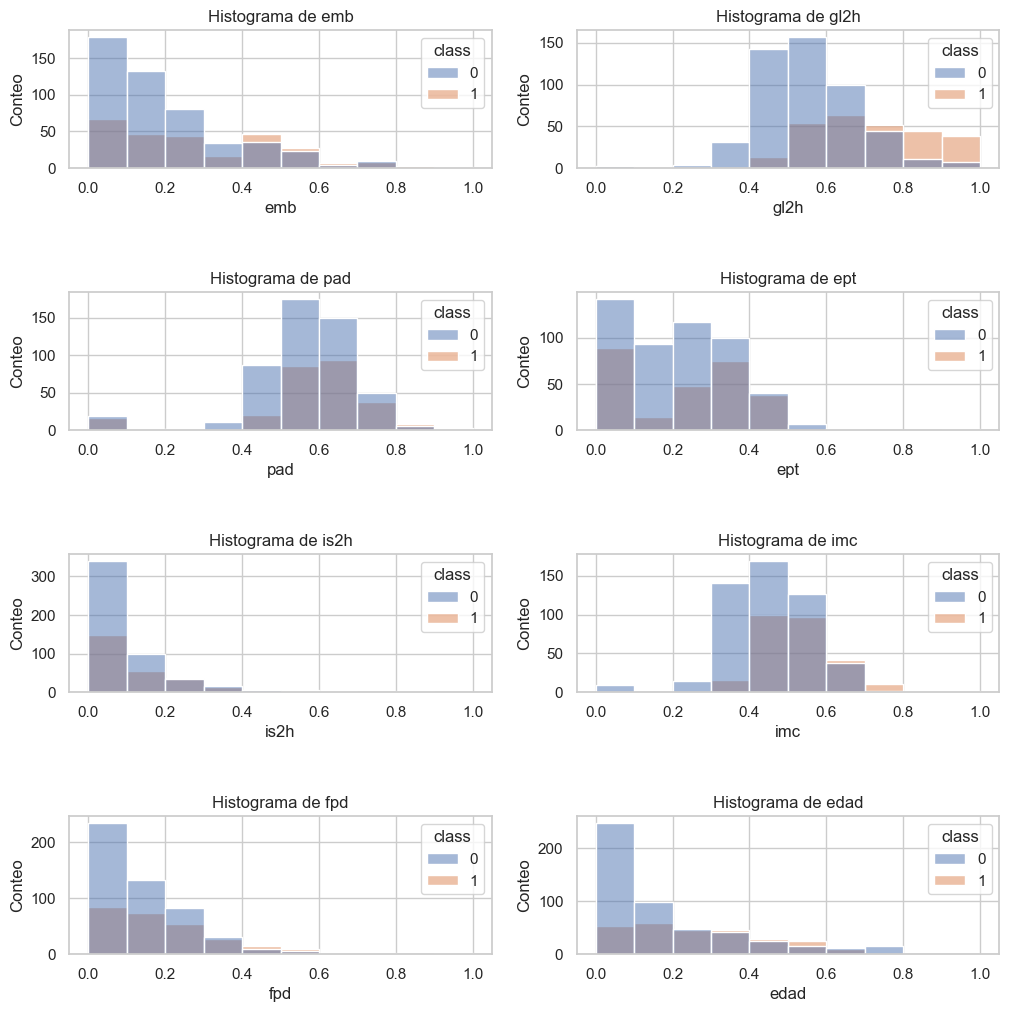

In [22]:
toggle_cell_code("button_2")

# Importar los datos
names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class']
dfPID = read_csv("Data/Pima Indian Data Set/pima-indians-diabetes.data", 
                    names=names)

dfPID['class'] = dfPID['class'].astype('category')

# Obtiene la lista de columnas numéricas (para los histogramas)
numeric_columns = list(dfPID.select_dtypes(include=['int64', 'float64']).columns)

scaler = MinMaxScaler()
dfPID[numeric_columns] = DataFrame(scaler.fit_transform(dfPID[numeric_columns])
                  , columns=dfPID[numeric_columns].columns)


# Establece el número de columnas y filas para los subplots
num_columns = len(numeric_columns)
num_rows = (num_columns + 1) // 2  # Dos columnas por fila

# Crea subplots para los histogramas
fig, axes = subplots(num_rows, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.9)

# Itera a través de las columnas numéricas y crea histogramas
for i, column in enumerate(numeric_columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]

    # Crea un histograma con hue

    histplot(data=dfPID, x=column, hue='class', ax=ax, bins=10)
    ax.set_title(f'Histograma de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Conteo')

# Maneja el caso de un número impar de columnas
if num_columns % 2 == 1:
    fig.delaxes(axes[num_rows - 1, 1])

show()

Estas gráficas no son concluyentes: En efecto, 'is2h' y 'ept' [__muestran una baja capacidad de discriminación__][1], sin embargo, las variables restantes no muestran un comportamiento claramente superior.

Para formalizar este análisis y para responder la segunda pregunta, acerca del grado de asociación entre variables, se hace uso de medidas de correlación. La medida de correlación más común es el **coeficiente de correlación de Pearson**, la cual proporciona una medida de la relación lineal entre dos variables aleatorias cuantitativas $X$ y $Y$. El coeficiente de correlación de Pearson se define como:

$$r_{xy}=\frac{\sum \limits_{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{(n-1)s_{x}s_{y}}
=\frac {\sum \limits_{i=1}^n (x_i - {\bar {x}})(y_i-{\bar {y}})}{\sqrt {\sum \limits _{i=1}^n (x_i-{\bar {x}})^2 \sum \limits _{i=1}^n (y_i-{\bar {y}})^2} }$$

Un valor de $1$ __implica una correlación directa total__: cuando una variable crece la otra crece en la misma proporción. Si el coeficiente toma un valor de 0, entonces no hay correlación lineal entre las variables. 


Un valor de $-1$ __representa una correlación inversa total__: cuando una variable aumenta, la otra disminuye en la misma proporción.



Una correlación entre dos variables se puede visualizar en un gráfico de dispersión como ilustra la siguiente figura :


<img src="https://upload.wikimedia.org/wikipedia/commons/0/02/Correlation_examples.png" />

La forma en que se ve la correlación en el gráfico de dispersión depende del tipo de correlación que exista entre las variables: correlación positiva, correlación negativa o falta de correlación.

Aquí están las características clave de cada tipo de correlación en un gráfico de dispersión:

1. **Correlación Positiva:** En una correlación positiva, a medida que el valor de una variable aumenta, el valor de la otra variable también tiende a aumentar. En un gráfico de dispersión, esto se verá como una tendencia ascendente en la nube de puntos. Los puntos tienden a formar una línea que se inclina hacia arriba desde la esquina inferior izquierda a la esquina superior derecha del gráfico.



2. **Correlación Negativa:** En una correlación negativa, a medida que el valor de una variable aumenta, el valor de la otra variable tiende a disminuir. En un gráfico de dispersión, esto se verá como una tendencia descendente en la nube de puntos. Los puntos tienden a formar una línea que se inclina hacia abajo desde la esquina superior izquierda a la esquina inferior derecha del gráfico.


3. **Falta de Correlación:** Cuando no hay una relación clara entre las dos variables, los puntos en el gráfico de dispersión se dispersarán de manera aleatoria sin una tendencia clara hacia arriba o hacia abajo. Esto indica una falta de correlación o una correlación muy débil.


Es importante notar que la fuerza de la correlación se refleja en cuán estrechamente los puntos se ajustan a la línea de tendencia. Cuanto más apretados estén los puntos alrededor de la línea de tendencia, más fuerte será la correlación.

Además, es útil calcular el coeficiente de correlación (por ejemplo, el coeficiente de correlación de Pearson) para cuantificar cuantitativamente la fuerza y la dirección de la correlación entre las variables. Este coeficiente puede variar entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta), con 0 indicando falta de correlación.


A continuación se calcula la matriz de correlación para los atributos del Pima Indians Diabetes Dataset:

In [27]:
# Contar datos con valores faltantes
dfPID.loc[dfPID['pad'] == 0,'pad'] = nan
dfPID.loc[dfPID['ept'] == 0,'ept'] = nan
dfPID.loc[dfPID['is2h'] == 0,'is2h'] = nan
dfPID.loc[dfPID['imc'] == 0,'imc'] = nan

dfPID['class'] = dfPID['class'].astype(int)

media = dfPID.mean()
sigma = dfPID.std()
dfPID = (dfPID - media) / sigma

dfPID = DataFrame(scaler.fit_transform(dfPID)
                  , columns=dfPID.columns)

set_option('display.float_format', lambda x: '%.2f' % x)

display(dfPID.corr(method='pearson'))

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
emb,1.00,0.13,0.21,0.11,0.08,0.01,-0.03,0.54,0.22
gl2h,0.13,1.00,0.22,0.21,0.59,0.21,0.14,0.26,0.47
pad,0.21,0.22,1.00,0.23,0.09,0.29,-0.00,0.33,0.17
ept,0.11,0.21,0.23,1.00,0.21,0.64,0.12,0.18,0.27
is2h,0.08,0.59,0.09,0.21,1.00,0.24,0.15,0.22,0.31
imc,0.01,0.21,0.29,0.64,0.24,1.00,0.15,0.02,0.31
fpd,-0.03,0.14,-0.00,0.12,0.15,0.15,1.00,0.03,0.17
edad,0.54,0.26,0.33,0.18,0.22,0.02,0.03,1.00,0.24
class,0.22,0.47,0.17,0.27,0.31,0.31,0.17,0.24,1.00


- Pregunta 1 : ¿Por qué las cantidades no coinciden ?
- Pregunta 2 : ¿Por qué los valores 0 (ceros) de las variables  se leas asigna NaN?
- Pregunta 3 : ¿Por qué se convierte la columna `class` a tipo entero?

Llaman la atención 3 elementos en esta tabla, señalados en la imagen siguiente:

![](../images/pearson2.png)

El primer elemento que llama la atención, estadísticamente, aunque no biológicamente, es la moderadamente alta correlación entre las variables `ept` e `imc`, lo cual ofrece cierta confianza en poder eliminar este atributo sin perder demasiada capacidad de discriminación. 

La situación con la variable `is2h` es menos clara con un valor de correlación de $0.580$ (correlación moderada) con la variable `gl2h` (también esperado clínicamente), sin embargo, el tercer elemento que llama la atención es que esta variable (`gl2h`) tiene mayor correlación con la clasificación (`class`) de diabético o no diabético que `is2h` y que cualquiera de los otros atributos, de manera que hay cierta confianza en que se puede prescindir también de `is2h`.

El análisis de correlación de las variables en el conjunto de datos Pima Indians Diabetes Dataset da un buen grado de confianza en que podemos eliminar las variables `ept` e`is2h` que contienen una gran porcentaje de valores faltantes y así poder utilizar la totalidad de los registros en el conjunto de datos. 

<div class="alert alert-warning" role="alert">

Los datos con variables correlacionadas pueden presentar varios problemas en el análisis de datos y en la construcción de modelos de aprendizaje automático. Algunos de los problemas más comunes incluyen:

1. **Sobreajuste (Overfitting):** Cuando las variables predictoras están altamente correlacionadas entre sí, los modelos de aprendizaje automático, como las regresiones y las redes neuronales, pueden tender al sobreajuste. Esto significa que el modelo puede aprender relaciones espurias o ruido en los datos en lugar de patrones genuinos, lo que puede resultar en un rendimiento deficiente en nuevos datos.

   **Posible solución:** Reducción de la dimensionalidad mediante técnicas como Análisis de Componentes Principales (PCA) o selección de características para eliminar variables redundantes y reducir la multicolinealidad.

2. **Inestabilidad en la Estimación:** La multicolinealidad (alta correlación entre variables) puede hacer que las estimaciones de coeficientes en modelos lineales sean inestables. Pequeños cambios en los datos pueden dar como resultado cambios significativos en los coeficientes estimados.

   **Posible solución:** Regularización de modelos lineales mediante técnicas como la regresión de Ridge o la regresión LASSO, que ayudan a estabilizar las estimaciones de coeficientes.

3. **Interpretación Difícil:** Cuando las variables están altamente correlacionadas, puede ser difícil interpretar la importancia relativa de cada variable en un modelo.

   **Posible solución:** Utilización de técnicas de análisis de importancia de características para evaluar la contribución de cada variable en la predicción.

4. **Reducción de Eficiencia Computacional:** La alta dimensionalidad debida a variables altamente correlacionadas puede aumentar la complejidad computacional de algunos algoritmos, lo que puede llevar a tiempos de entrenamiento más largos.

   **Posible solución:** Reducción de dimensionalidad antes de aplicar algoritmos complejos.

5. **Problemas en Validación Cruzada:** La validación cruzada puede ser problemática cuando las variables están altamente correlacionadas, ya que las particiones pueden introducir sesgos debido a la estructura de correlación.

   **Posible solución:** Considerar técnicas de validación cruzada estratificada o técnicas específicas para datos con correlación.

Para abordar estos problemas, es importante comprender la naturaleza de la correlación entre las variables en tus datos y aplicar las soluciones apropiadas según el contexto. Además, la exploración de datos y la comprensión de las relaciones entre variables son pasos críticos en cualquier análisis de datos para identificar y abordar problemas de correlación.
    
 <div class="alert alert-warning" role="alert">ESTO ES MUY IMPORTANTE</div>

##### Tarea :

Generación de jerarquía de conceptos para datos nominales, donde los atributos como calle se pueden generalizar a conceptos de nivel superior, como ciudad o país . Muchas jerarquías para atributos nominales están implícitas en el esquema de la base de datos y pueden definirse automáticamente en el nivel de definición del esquema.

# Recursos

1. [Efectos de la discretización de datos en modelos de clasificación](https://www.youtube.com/watch?v=t1GwSsDxCOs&ab_channel=DataScienceyMachineLearningparaNegocios)
2. [Canal sobre temas de SL/ML](https://www.youtube.com/@CodigoMaquina)

# Referencias 

[1] Notebook Datario